This Function is able to take characteristics from different base clustering and create a new final partition taking into consideration the partitions found by base clusterings. 3 Consensus Functions are available:
     1. **GMM_MCA**: This ensembel use the base clustering as features and convert it into one dimension, after this Univariate Gaussian Mixture Model is used for make the final partition.
     2. **GMM_Voting**: this ensembel first perform relabel and majority voting technique, further it use the majority voting as features for perform Multivariate Gaussian Mixture Model to find the final partition.
     3. **GMM_Pairwise similarity**: the algorithm compute the pairwise similarity matrix of the base clustering and the use it as feature for find final partitions using Multivariate Gaussian Mixture Model.

Additional, a Clustering Ensembel Selection score based in Quality and Diversity is included, where insted of used all base clusterings just the best base partitions are selected to be considered in the ensembel.

### Parameters:
**data: pandas dataframe or array**, 
     features in data that were used to find based clustering
base_clustering: array of arrays with the labels found by the base clustering. Example: [[0,1,1], [1,1,0], [1,0,0]]

**consensus_function:  {'GMM_MCA', 'GMM_Voting', 'GMM_Pair'}** 
                    consensus function that you want to use
                    
                    
**n_max_clusters: int, optional, default: average number of k in te base clustering**

**iterations: int**
            number of times you want the Expectation Maximization algorithm is performed

**ensembel_selection: {'yes', 'no'}**
                    indicate if you want to use the ensembel selection score for work with a subset of the best                     base clustering

if yes in ensembel_selection:
**alpha: float, optional, default: 0.5**
       weight given to quality in quality and diversity score for ensembel selection

**threshold: float, optional, default: mean score in the base clusteing**
           minimum score that the base clustering should have to be part of the ensembel


        

## Example

### Base Clustering

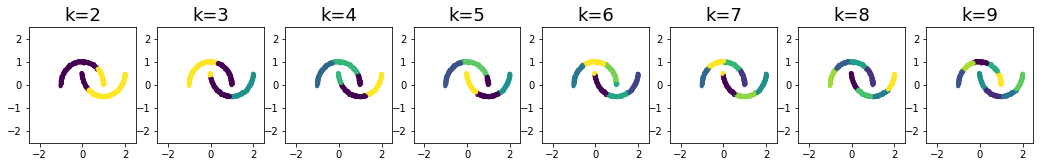

In [5]:
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Make a toy dataset
x, y = datasets.make_moons(n_samples=500, shuffle=True, noise=0.02, random_state=None)

# Create base clustering, we will use k-means with different number of k (2 to 6)

plt.figure(figsize=(18, 20))

plot_num =1
k_list= range(2, 10)
base_clustering=[]
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x)
    y_pred=kmeans.labels_
    base_clustering.append(y_pred)
    
    #Make visualization of found clusters
    plt.subplot(len(k_list), len(k_list), plot_num)
        
    plt.title('k=%i' %k, size=18)
    plt.scatter(x[:, 0], x[:, 1], s=10, c=y_pred)

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plot_num += 1
    
plt.show()
    
base_clustering=np.squeeze(base_clustering,0)

    





### Clustering Ensembel

#### Without Clustering Ensembel Selection

Number of base clusterings to be part in the Ensemble: 8
Number of maximum clusters in the Ensemble: 5


  0%|          | 0/20 [00:00<?, ?it/s]


(-2.5, 2.5)

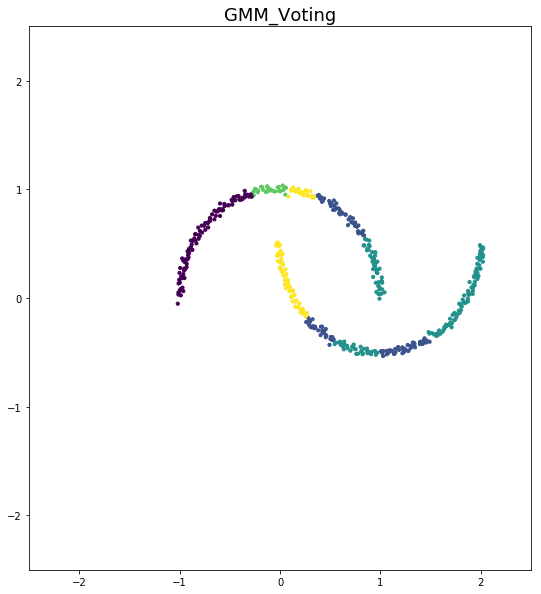

In [6]:
#We will use the GMM_Voting to show how our Consensus Functions works

import Clustering_Ensembles

final_partition_GMMVoting=Clustering_Ensembles.do_ensemble(data=x, base_clustering=base_clustering, iterations=20, consensus_function='GMM_Voting', ensembel_selection='no')

#Visualize the results
plt.figure(figsize=(9, 10))
plt.plot()
plt.title('GMM_Voting', size=18)
plt.scatter(x[:, 0], x[:, 1], s=10, c=final_partition_GMMVoting)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

#### Using Clustering Ensemble Selection

/home/grecia/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/grecia/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/grecia/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/grecia/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/grecia/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: 

Number of base clusterings to be part in the Ensemble: 3
Number of maximum clusters in the Ensemble: 2


(-2.5, 2.5)

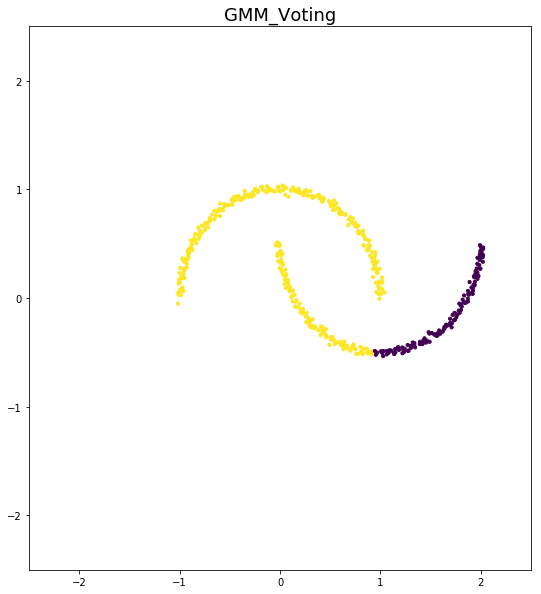

In [11]:
final_partition_GMMVoting=Clustering_Ensembles.do_ensemble(data=x,base_clustering=base_clustering, iterations=20, consensus_function='GMM_Voting', ensembel_selection='yes')

#Visualize the results
plt.figure(figsize=(9, 10))
plt.plot()
plt.title('GMM_Voting', size=18)
plt.scatter(x[:, 0], x[:, 1], s=10, c=final_partition_GMMVoting)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)